<a href="https://colab.research.google.com/github/Ali4541-star/AI-For-Beginners/blob/main/Sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LEARNING PACK AND PAD SEQUENCES

In [56]:
import torch
import seaborn as sns
from torchaudio import transforms
import torchaudio
from torchaudio.utils import download_asset
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [42]:
sound_path = r"/content/LA_T_1007663.flac"
frame_time = 0.01  # s
sr = 16_000  # sample/s
window_length = int(frame_time*sr)

In [80]:
sound, sr = torchaudio.load(sound_path, normalize=True)
print(sound.size())  # [1, sr*duration]

torch.Size([1, 58695])


In [44]:
sound_metadata = torchaudio.info(download_asset(sound_path))
print(sound_metadata)

AudioMetaData(sample_rate=16000, num_frames=58695, num_channels=1, bits_per_sample=16, encoding=FLAC)


In [45]:
print(sound.max())
print(sound.min())

tensor(0.8435)
tensor(-1.)


In [46]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")

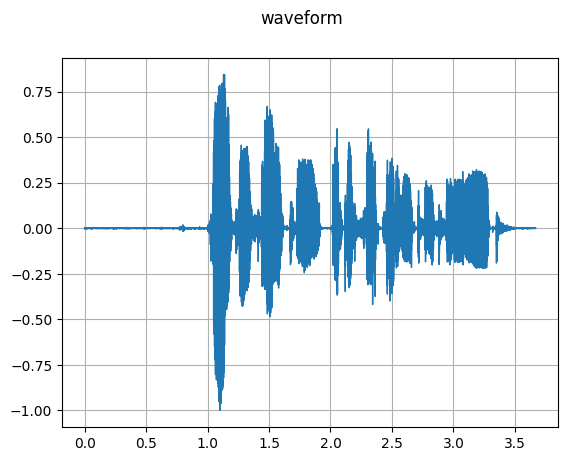

In [47]:
plot_waveform(sound, sr)

In [50]:
t_MFCC = transforms.MFCC(
    sample_rate=16_000,
    n_mfcc=13,
    log_mels=True,
    melkwargs={
        "n_fft": window_length,  # örnek/pencere
        "hop_length": window_length//2,  # atlama
        "n_mels": 23  # mel filterbank
        }
    )

In [68]:
mfcc_sound = t_MFCC(sound)
print(mfcc_sound.shape)  # [channel, n_mfcc, n_frame]
print(mfcc_sound[:, 1, :])

torch.Size([1, 13, 734])
tensor([[  8.1272,   7.3829,   8.1032,   8.3119,   7.3502,   7.2895,   6.5075,
           5.2679,   5.5410,   8.3719,   8.9729,   8.6746,   8.8034,   6.3134,
           6.2014,   7.3556,   4.9402,   4.8838,   6.2819,   7.4751,   8.5169,
           7.6240,   7.6485,   6.9916,   5.4342,   7.7627,   7.6987,   7.6550,
           7.2586,   7.6148,   8.4674,   7.3640,   7.7053,   7.9090,   8.2940,
           7.4438,   7.1529,   9.4306,   8.5298,   7.5626,   7.8649,   7.5805,
           6.4270,   4.1501,   5.9112,   6.8323,   7.8791,   8.7903,   8.5535,
           9.3211,   8.4010,   7.7139,   8.4190,   8.7422,   5.8537,   5.0231,
           6.1146,   6.6294,   6.8891,   4.8533,   5.5072,   7.0233,   8.1445,
           6.0380,   6.7249,   5.9803,   7.3114,   8.1175,   7.5876,   8.6079,
           8.7676,   7.2994,   1.4125,   6.7720,   5.4271,   6.3178,   7.0610,
           6.9594,   6.5622,   4.6036,   6.4919,   6.2575,   7.6493,   7.5396,
           8.5203,   8.9064

In [69]:
mfcc_sound = mfcc_sound.squeeze(0).numpy()
print(mfcc_sound.shape)

(13, 734)


In [74]:
import librosa

In [164]:
def plot_spectogram(sound, sr=22050, n_fft=2048, hop_length=256, n_mels=128, scale="linear"):
  if scale == "mel":
    print("inside mel")
    sound_db =  librosa.feature.melspectrogram(
        y=sound,
        sr=sr,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels = n_mels
        )
    print(sound_db.shape)
    sound_db = librosa.power_to_db(np.abs(sound_db), ref=np.max)
    print(sound_db.shape)
  elif scale == "linear" or "log":
    sound = librosa.stft(sound, n_fft=n_fft, hop_length=hop_length)
    sound_db = librosa.amplitude_to_db(np.abs(sound), ref=np.max)
  else:
    raise ValueError("This input is not valid")
  fig, ax = plt.subplots()
  img = librosa.display.specshow(
      sound_db,
      x_axis="time",
      y_axis=scale,
      ax=ax,
      hop_length=hop_length,
      sr=sr
      )

  fig.colorbar(img, ax=ax, format="%+2.f dB")
  plt.show()

torch.Size([1, 58695])
inside mel
(512, 734)
(512, 734)


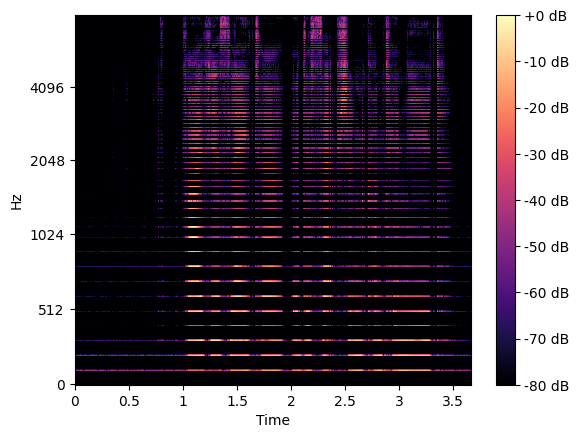

In [168]:
print(sound.shape)
melkwargs = {"sr":sr, "n_fft": window_length, "hop_length": window_length//2, "n_mels": 256}
plot_spectogram(sound.squeeze(0).numpy(),
                sr=sr,
                n_fft=window_length,
                hop_length=window_length//2,
                scale="mel",
                n_mels=512
                )

torch.Size([1, 58695])


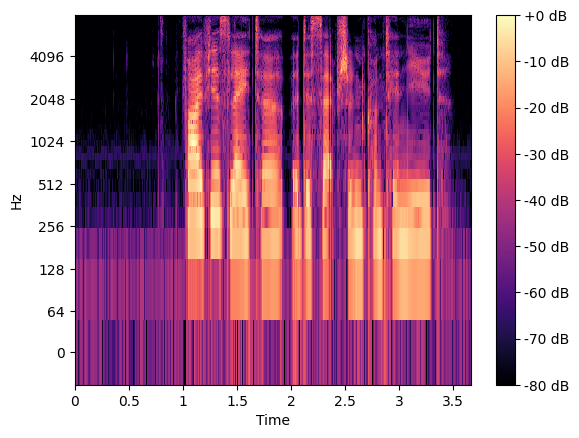

In [158]:
print(sound.shape)
plot_spectogram(sound.squeeze(0).numpy(),
                scale="log",
                hop_length=window_length//2,
                n_fft=window_length,
                sr=sr)

torch.Size([1, 58695])


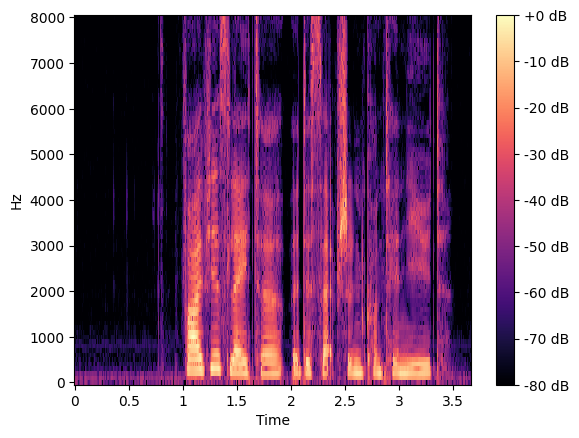

In [159]:
print(sound.shape)
plot_spectogram(sound.squeeze(0).numpy(),
                scale="linear",
                hop_length=window_length//2,
                n_fft=window_length,
                sr=sr)